# Data Cleaning

In [1]:
# Import dependencies
import os
import pandas as pd
import numpy as np
from scipy.stats import skew
from statistics import mean
import matplotlib.pyplot as plt

%run functions1.ipynb

## Read in Files

In [2]:
# Raw dataset file path
rawdata_path = "resources/voiced_dataset/"

# Get all the files in the directory
files = os.listdir(rawdata_path)

In [3]:
# Initialise the list to hold dictionaries
metadata_list = []

# Parse the data in the info files
for file in files:
    
    # Initialise the dictionary to store the info
    metadata_dict = dict()
    
    # Look through info files only
    if file.startswith("voice") and file.endswith("-info.txt"):
        
        # Read the text file
        with open(rawdata_path + file, 'r') as file:
            for line in file:
                
                # Split each line into a key-value pair using delimiter
                key, value = map(str.strip, line.split("\t"))
                
                # Ignore the empty lines by checking whitespaces
                if not line.strip():
                    continue
                else:
                    # Remove the colon
                    key = key.replace(":", "")
                    
                    # Load the data to a dictionary
                    metadata_dict[key] = value
                    
            # Append the dictionary to the list
            metadata_list.append(metadata_dict)

# Convert the list to a DataFrame
metadata_df = pd.DataFrame(metadata_list)
metadata_df.head()

,ID,Age,Gender,Diagnosis,Occupation status,Voice Handicap Index (VHI) Score,Reflux Symptom Index (RSI) Score,Smoker,Number of cigarettes smoked per day,Alcohol consumption,...,Amount of glasses drinked in a day,Tomatoes,Coffee,Number of cups of coffee drinked in a day,Chocolate,Gramme of chocolate eaten in a day,Soft cheese,Gramme of soft cheese eaten in a day,Citrus fruits,Number of citrus fruits eaten in a day
0,voice100,24,m,healthy,NU,0,5,no,NU,casual drinker,...,NU,never,always,3,sometimes,NU,almost always,NU,never,NU
1,voice101,60,m,healthy,NU,80,10,no,NU,nondrinker,...,NU,sometimes,always,4,sometimes,NU,sometimes,NU,never,NU
2,voice192,22,m,hyperkinetic dysphonia,Cook,0,10,no,NU,nondrinker,...,NU,sometimes,always,NU,always,NU,sometimes,NU,almost always,NU
3,voice193,46,f,hyperkinetic dysphonia,Housewife,0,36,yes,15,casual drinker,...,NU,sometimes,always,2,sometimes,NU,sometimes,NU,sometimes,NU
4,voice008,51,f,reflux laryngitis,Researcher,19,15,no,NU,casual drinker,...,NU,almost always,always,2,almost always,20g,sometimes,100 gr,almost always,1


## Clean `metadata_df`

In [4]:
# Check the dataframe
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 24 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   ID                                                                208 non-null    object
 1   Age                                                               208 non-null    object
 2   Gender                                                            208 non-null    object
 3   Diagnosis                                                         208 non-null    object
 4   Occupation status                                                 208 non-null    object
 5   Voice Handicap Index (VHI) Score                                  208 non-null    object
 6   Reflux Symptom Index (RSI) Score                                  208 non-null    object
 7   Smoker                                      

### Simplify the column names

In [5]:
# Print the columns
original_cols = list(metadata_df.columns)
original_cols

['ID',
 'Age',
 'Gender',
 'Diagnosis',
 'Occupation status',
 'Voice Handicap Index (VHI) Score',
 'Reflux Symptom Index (RSI) Score',
 'Smoker',
 'Number of cigarettes smoked per day',
 'Alcohol consumption',
 'Number of glasses containing alcoholic beverage drinked in a day',
 "Amount of water's litres drink every day",
 'Eating habits',
 'Carbonated beverages',
 'Amount of glasses drinked in a day',
 'Tomatoes',
 'Coffee',
 'Number of cups of coffee drinked in a day',
 'Chocolate',
 'Gramme of chocolate eaten in  a day',
 'Soft cheese',
 'Gramme of soft cheese eaten in a day',
 'Citrus fruits',
 'Number of citrus fruits eaten in a day']

In [6]:
# Convert the column names to lower case
lowercase_cols = [col_name.lower() for col_name in original_cols]

# Create a copy of metadata_df
renamed_df = metadata_df.copy()

# Update the column names
renamed_df.columns = lowercase_cols

# Display the DataFrame
renamed_df.head()

,id,age,gender,diagnosis,occupation status,voice handicap index (vhi) score,reflux symptom index (rsi) score,smoker,number of cigarettes smoked per day,alcohol consumption,...,amount of glasses drinked in a day,tomatoes,coffee,number of cups of coffee drinked in a day,chocolate,gramme of chocolate eaten in a day,soft cheese,gramme of soft cheese eaten in a day,citrus fruits,number of citrus fruits eaten in a day
0,voice100,24,m,healthy,NU,0,5,no,NU,casual drinker,...,NU,never,always,3,sometimes,NU,almost always,NU,never,NU
1,voice101,60,m,healthy,NU,80,10,no,NU,nondrinker,...,NU,sometimes,always,4,sometimes,NU,sometimes,NU,never,NU
2,voice192,22,m,hyperkinetic dysphonia,Cook,0,10,no,NU,nondrinker,...,NU,sometimes,always,NU,always,NU,sometimes,NU,almost always,NU
3,voice193,46,f,hyperkinetic dysphonia,Housewife,0,36,yes,15,casual drinker,...,NU,sometimes,always,2,sometimes,NU,sometimes,NU,sometimes,NU
4,voice008,51,f,reflux laryngitis,Researcher,19,15,no,NU,casual drinker,...,NU,almost always,always,2,almost always,20g,sometimes,100 gr,almost always,1


In [7]:
# Print updated columns
list(renamed_df.columns)

['id',
 'age',
 'gender',
 'diagnosis',
 'occupation status',
 'voice handicap index (vhi) score',
 'reflux symptom index (rsi) score',
 'smoker',
 'number of cigarettes smoked per day',
 'alcohol consumption',
 'number of glasses containing alcoholic beverage drinked in a day',
 "amount of water's litres drink every day",
 'eating habits',
 'carbonated beverages',
 'amount of glasses drinked in a day',
 'tomatoes',
 'coffee',
 'number of cups of coffee drinked in a day',
 'chocolate',
 'gramme of chocolate eaten in  a day',
 'soft cheese',
 'gramme of soft cheese eaten in a day',
 'citrus fruits',
 'number of citrus fruits eaten in a day']

In [8]:
# Simplify the column names
renamed_df = renamed_df.rename(columns={
    'voice handicap index (vhi) score': 'vhi score',
    'reflux symptom index (rsi) score': 'rsi score',
    'number of cigarettes smoked per day': 'cigarettes per day',
    'number of glasses containing alcoholic beverage drinked in a day': 'alcohol per day',
    "amount of water's litres drink every day": 'water litres per day',
    'amount of glasses drinked in a day': 'carbonated per day',
    'number of cups of coffee drinked in a day': 'coffee per day',
    'gramme of chocolate eaten in  a day': 'chocolate grams per day',
    'gramme of soft cheese eaten in a day': 'soft cheese per day',
    'number of citrus fruits eaten in a day': 'citrus fruits per day'
})

# Display the updated DataFrame
renamed_df.head()

,id,age,gender,diagnosis,occupation status,vhi score,rsi score,smoker,cigarettes per day,alcohol consumption,...,carbonated per day,tomatoes,coffee,coffee per day,chocolate,chocolate grams per day,soft cheese,soft cheese per day,citrus fruits,citrus fruits per day
0,voice100,24,m,healthy,NU,0,5,no,NU,casual drinker,...,NU,never,always,3,sometimes,NU,almost always,NU,never,NU
1,voice101,60,m,healthy,NU,80,10,no,NU,nondrinker,...,NU,sometimes,always,4,sometimes,NU,sometimes,NU,never,NU
2,voice192,22,m,hyperkinetic dysphonia,Cook,0,10,no,NU,nondrinker,...,NU,sometimes,always,NU,always,NU,sometimes,NU,almost always,NU
3,voice193,46,f,hyperkinetic dysphonia,Housewife,0,36,yes,15,casual drinker,...,NU,sometimes,always,2,sometimes,NU,sometimes,NU,sometimes,NU
4,voice008,51,f,reflux laryngitis,Researcher,19,15,no,NU,casual drinker,...,NU,almost always,always,2,almost always,20g,sometimes,100 gr,almost always,1


In [9]:
# Convert 'per day' to pd
renamed_cols = list(renamed_df.columns)

updated_cols = []
# Update each column
for col in renamed_cols:
    col = col.replace("per day", "pd")
    col = col.replace(" ", "_")
    updated_cols.append(col)

# Set the updated columns
renamed_df.columns = updated_cols

# Display the updated DataFrame
renamed_df.head()

,id,age,gender,diagnosis,occupation_status,vhi_score,rsi_score,smoker,cigarettes_pd,alcohol_consumption,...,carbonated_pd,tomatoes,coffee,coffee_pd,chocolate,chocolate_grams_pd,soft_cheese,soft_cheese_pd,citrus_fruits,citrus_fruits_pd
0,voice100,24,m,healthy,NU,0,5,no,NU,casual drinker,...,NU,never,always,3,sometimes,NU,almost always,NU,never,NU
1,voice101,60,m,healthy,NU,80,10,no,NU,nondrinker,...,NU,sometimes,always,4,sometimes,NU,sometimes,NU,never,NU
2,voice192,22,m,hyperkinetic dysphonia,Cook,0,10,no,NU,nondrinker,...,NU,sometimes,always,NU,always,NU,sometimes,NU,almost always,NU
3,voice193,46,f,hyperkinetic dysphonia,Housewife,0,36,yes,15,casual drinker,...,NU,sometimes,always,2,sometimes,NU,sometimes,NU,sometimes,NU
4,voice008,51,f,reflux laryngitis,Researcher,19,15,no,NU,casual drinker,...,NU,almost always,always,2,almost always,20g,sometimes,100 gr,almost always,1


### Convert `NU` values to `NaN`

In [10]:
# Create a copy of renamed
updated_df = renamed_df.copy()

# Convert the 'NU' values to 'NaN'
updated_df = updated_df.replace("NU", np.nan)

# Check the updated DataFrame info
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    208 non-null    object
 1   age                   208 non-null    object
 2   gender                208 non-null    object
 3   diagnosis             208 non-null    object
 4   occupation_status     167 non-null    object
 5   vhi_score             208 non-null    object
 6   rsi_score             208 non-null    object
 7   smoker                208 non-null    object
 8   cigarettes_pd         41 non-null     object
 9   alcohol_consumption   208 non-null    object
 10  alcohol_pd            25 non-null     object
 11  water_litres_pd       208 non-null    object
 12  eating_habits         208 non-null    object
 13  carbonated_beverages  208 non-null    object
 14  carbonated_pd         21 non-null     object
 15  tomatoes              208 non-null    ob

In [11]:
# Display the columns with null values
cols_with_null = updated_df.columns[updated_df.isnull().any()]

# Display as a DataFrame
updated_nulls_df = updated_df[cols_with_null]
updated_nulls_df.head()

,occupation_status,cigarettes_pd,alcohol_pd,carbonated_pd,coffee_pd,chocolate_grams_pd,soft_cheese_pd,citrus_fruits_pd
0,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN
2,Cook,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Housewife,15,NaN,NaN,2,NaN,NaN,NaN
4,Researcher,NaN,NaN,NaN,2,20g,100 gr,1


### Clean categorical columns
- Except `diagnosis` and `occupation_status`, do these separately.

#### `gender` column

In [12]:
# Check the gender column
updated_df['gender'].value_counts(dropna=False)

gender
f    136
m     72
Name: count, dtype: int64

__NOTE__: `gender` column does not require cleaning.
___

#### `smoker` column

In [13]:
# Check the smoker column
updated_df['smoker'].value_counts(dropna=False)

smoker
no               98
No               56
yes              43
casual smoker    11
Name: count, dtype: int64

In [14]:
# Convert the 'No' to 'no'
updated_df['smoker'] = updated_df['smoker'].str.replace('No', 'no')

# Convert 'casual smoker' to 'casual'
updated_df['smoker'] = updated_df['smoker'].str.replace('casual smoker', 'casual')

# Display the updated values
updated_df['smoker'].value_counts(dropna=False)

smoker
no        154
yes        43
casual     11
Name: count, dtype: int64

Plan for encoding the `smoker` column
- `0` for `no`
- `1` for `casual`
- `2` for `yes`
___

#### `alcohol_consumption` column

In [15]:
# Check the alcohol_consumption column
updated_df['alcohol_consumption'].value_counts(dropna=False)

alcohol_consumption
casual drinker      101
nondrinker           84
habitual drinker     23
Name: count, dtype: int64

__NOTE__: `alcohol_consumption` column - cleaning required.

In [16]:
# Simplify the values for alcohol_consumption
updated_df['alcohol_consumption'] = updated_df['alcohol_consumption'].str.replace(" drinker", "")

# Check the updated values
updated_df['alcohol_consumption'].value_counts(dropna=False)

alcohol_consumption
casual        101
nondrinker     84
habitual       23
Name: count, dtype: int64

Plan for encoding `alcohol_consumption` column
- `0` for `nondrinker`
- `1` for `casual`
- `2` for `habitual`
___

#### `eating_habits` column

In [17]:
# Check the eating_habits column
updated_df['eating_habits']

0       
1       
2       
3       
4       
      ..
203     
204     
205     
206     
207     
Name: eating_habits, Length: 208, dtype: object

In [18]:
# Header in the text file, drop column
updated_df = updated_df.drop(columns=['eating_habits'])

In [19]:
# Check the eating habits columns
eating_habits = ['carbonated_beverages', 'tomatoes', 'coffee', 'chocolate', 'soft_cheese', 'citrus_fruits']

# Check unique values
unique_list = []
for col in eating_habits:
    unique_values = updated_df[col].unique()
    for val in unique_values:
        if val not in unique_list:
            unique_list.append(val)
print(unique_list)

['almost always', 'never', 'sometimes', 'almost never', 'always']


Encode the eating habits columns:
- `0` for `never`
- `1` for `almost_never`
- `2` for `sometimes`
- `3` for `almost_always`
- `4` for `always`
___

In [20]:
# Create a `clean_cat_df`
clean_cat_df = updated_df.copy()

### Clean numerical columns

In [21]:
# Isolate columns to convert to int type
convert_cols = ['age', 'vhi_score', 'rsi_score']

# Convert columns to int
clean_cat_df[convert_cols] = clean_cat_df[convert_cols].astype(int)

# Confirm changes
clean_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    208 non-null    object
 1   age                   208 non-null    int64 
 2   gender                208 non-null    object
 3   diagnosis             208 non-null    object
 4   occupation_status     167 non-null    object
 5   vhi_score             208 non-null    int64 
 6   rsi_score             208 non-null    int64 
 7   smoker                208 non-null    object
 8   cigarettes_pd         41 non-null     object
 9   alcohol_consumption   208 non-null    object
 10  alcohol_pd            25 non-null     object
 11  water_litres_pd       208 non-null    object
 12  carbonated_beverages  208 non-null    object
 13  carbonated_pd         21 non-null     object
 14  tomatoes              208 non-null    object
 15  coffee                208 non-null    ob

#### `cigarettes_pd` column

In [22]:
# Check the smoker and cigarettes_pd columns
smoker_columns = ['smoker', 'cigarettes_pd']
clean_cat_df[smoker_columns].head()

,smoker,cigarettes_pd
0,no,NaN
1,no,NaN
2,no,NaN
3,yes,15
4,no,NaN


In [23]:
# Confirm the smokers have a valid value in the cigarettes_pd
smoker_null = (clean_cat_df['smoker'] == 'yes') & (clean_cat_df['cigarettes_pd'].isnull())
clean_cat_df.loc[smoker_null, smoker_columns]

,smoker,cigarettes_pd
40,yes,NaN
83,yes,NaN
138,yes,NaN
173,yes,NaN


__NOTE__: `yes` smokers should have a value for `cigarettes_pd`. Define a method for imputation.

Skewness: 1.030643653897744


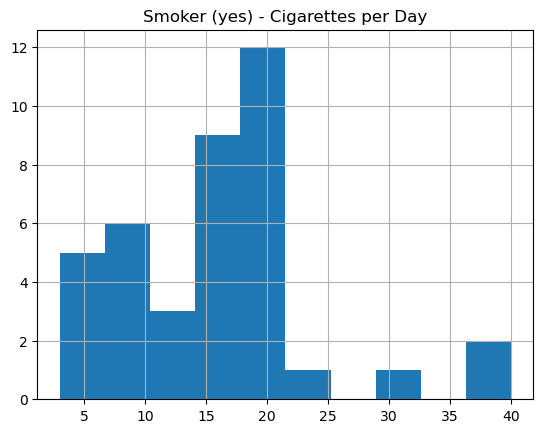

In [24]:
# Set the row conditions
smoker_notnull = (clean_cat_df['smoker'] == 'yes') & (~clean_cat_df['cigarettes_pd'].isnull())

# Create a copy of the series for plotting
num_cigarettes_df = clean_cat_df[smoker_notnull]['cigarettes_pd'].copy()

# Convert values for plotting
check_data = num_cigarettes_df.fillna(0).astype(int)

# Display a histogram of the cigarettes_pd column
check_data.hist()
plt.title('Smoker (yes) - Cigarettes per Day')

# Check skewness
print(f'Skewness: {skew(check_data)}')

__NOTE__: Skew value close to `1` means skewed to the right (shown in the histogram), use `median`.

In [25]:
# Calculate the median value (since skewed)
smoker_median = clean_cat_df.loc[smoker_notnull, 'cigarettes_pd'].astype(int).median()
print(f'Median cigarettes per day for smokers: {smoker_median}')

# Impute the missing values
clean_cat_df.loc[smoker_null, 'cigarettes_pd'] = smoker_median

Median cigarettes per day for smokers: 15.0


In [26]:
# Confirm the casual smokers have a valid value in the cigarettes_pd
casual_null = (clean_cat_df['smoker'] == 'casual') & (clean_cat_df['cigarettes_pd'].isnull())
clean_cat_df.loc[casual_null]

,id,age,gender,diagnosis,occupation_status,vhi_score,rsi_score,smoker,cigarettes_pd,alcohol_consumption,...,carbonated_pd,tomatoes,coffee,coffee_pd,chocolate,chocolate_grams_pd,soft_cheese,soft_cheese_pd,citrus_fruits,citrus_fruits_pd
33,voice069,63,m,reflux laryngitis,Employee,11,10,casual,NaN,nondrinker,...,NaN,sometimes,always,NaN,sometimes,NaN,always,NaN,sometimes,NaN
35,voice161,65,m,hypokinetic dysphonia (glottic insufficiency),Technical operator,45,0,casual,NaN,casual,...,NaN,sometimes,always,2,almost never,NaN,sometimes,NaN,almost never,NaN
45,voice155,33,f,hyperkinetic dysphonia,Housewife,34,0,casual,NaN,nondrinker,...,NaN,sometimes,always,3,sometimes,NaN,sometimes,NaN,sometimes,NaN
84,voice106,21,m,hypokinetic dysphonia,NaN,35,13,casual,NaN,nondrinker,...,NaN,almost always,almost always,NaN,almost always,NaN,almost never,NaN,sometimes,NaN
100,voice004,28,f,hypokinetic dysphonia,Researcher,20,9,casual,NaN,casual,...,NaN,sometimes,always,3,sometimes,NaN,almost always,NaN,sometimes,NaN
118,voice061,33,f,healthy,Researcher,19,12,casual,NaN,habitual,...,NaN,almost always,almost always,2,sometimes,NaN,sometimes,NaN,almost never,NaN
127,voice163,44,f,hyperkinetic dysphonia,Housewife,30,11,casual,NaN,nondrinker,...,NaN,sometimes,always,3,sometimes,NaN,almost never,NaN,sometimes,NaN
132,voice049,44,f,healthy,Employee,4,20,casual,NaN,casual,...,NaN,sometimes,always,3,almost never,NaN,almost never,NaN,almost always,2
163,voice178,20,f,healthy,Student,0,16,casual,NaN,nondrinker,...,NaN,almost never,sometimes,NaN,sometimes,NaN,sometimes,NaN,sometimes,NaN


In [27]:
# Check the casual smokers who have have a valid cigarettes_pd value
clean_cat_df.loc[clean_cat_df['smoker'] == 'casual', 'cigarettes_pd'].value_counts(dropna=False)

cigarettes_pd
NaN    9
2      2
Name: count, dtype: int64

__NOTE__:
- There are `9` `casual` smokers with an invalid `cigarettes_pd` value.
- There are only `2` `casual` smokers with a valid value of `2`.

In [28]:
# Use this value to impute missing values
casual_value = clean_cat_df.loc[clean_cat_df['smoker'] == 'casual', 'cigarettes_pd'].value_counts().mean()

# Impute the missing values
clean_cat_df.loc[casual_null, 'cigarettes_pd'] = casual_value

In [29]:
# Convert all other NaN values to `0`
clean_cat_df['cigarettes_pd'] = clean_cat_df['cigarettes_pd'].fillna(0)

# Convert the column type to an integer
clean_cat_df['cigarettes_pd'] = clean_cat_df['cigarettes_pd'].astype(int)

# Confirm changes
clean_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    208 non-null    object
 1   age                   208 non-null    int64 
 2   gender                208 non-null    object
 3   diagnosis             208 non-null    object
 4   occupation_status     167 non-null    object
 5   vhi_score             208 non-null    int64 
 6   rsi_score             208 non-null    int64 
 7   smoker                208 non-null    object
 8   cigarettes_pd         208 non-null    int64 
 9   alcohol_consumption   208 non-null    object
 10  alcohol_pd            25 non-null     object
 11  water_litres_pd       208 non-null    object
 12  carbonated_beverages  208 non-null    object
 13  carbonated_pd         21 non-null     object
 14  tomatoes              208 non-null    object
 15  coffee                208 non-null    ob

#### `alcohol_pd` column

In [30]:
# Check the alcohol_consumption and alcohol_pd columns
alcohol_columns = ['alcohol_consumption', 'alcohol_pd']
clean_cat_df[alcohol_columns].tail()

,alcohol_consumption,alcohol_pd
203,casual,NaN
204,casual,NaN
205,casual,NaN
206,habitual,1
207,casual,NaN


In [31]:
# Update the nondrinker value to `0`
clean_cat_df.loc[clean_cat_df['alcohol_consumption'] == 'nondrinker', 'alcohol_pd'] = 0

In [32]:
# Check the count for all unique values
clean_cat_df['alcohol_pd'].value_counts(dropna=False)

alcohol_pd
NaN           99
0             84
1             10
2              6
2 per week     3
1 per week     1
3 per week     1
1/2            1
0.1            1
0.3            1
0,5            1
Name: count, dtype: int64

__NOTE__: Write a function to clean this column.

In [33]:
def split_values(str_input, delimiter):
    """
    Purpose:
    Convert an input such as "25-50 g" to a single
    integer value that is the average of the numbers
    (37.5 in this case).
    
    Input:
        str_input = the string to convert
        delimiter = what to split the string by
        
    Output:
        mean_value
    """
    # Split by the delimiter
    sep_values = str_input.split(delimiter)
    
    # Convert each value to an integer
    sep_values = [int(val) for val in sep_values]
    
    # Calculate the mean value
    mean_value = mean(sep_values)
    
    return mean_value

In [34]:
def clean_pd(value):
    """
    Purpose:
    - Clean numerical 'X_pd' columns.
    - To be used with `apply()`.
    
    Pipeline:
    - Convert to a string for manipulation.
    - Strip non-numerical values.
    - Calculate averages as required.
    - Return an int value.
    """
    
    # Values which do not need cleaning
    try:
        return float(value)
    
    # Values which need cleaning
    except:
        # Convert value to a string
        value = str(value)

        ### REMOVE STRINGS ###
        # Check if ' per week' is in the value
        if ' per week' in value:
            # Remove the ' per week' string
            converted = value.replace(" per week", "").strip()

            # Get the per day value
            per_day = round(int(converted)/7, 1)

            return per_day
        
        ### CALCULATE AVERAGES ###
        elif '/' in value:
            return split_values(value, "/")
        
        ### OTHER CLEANING ###
        elif ',' in value:
            return float(value.replace(",", "."))
        
        # Catchall
        else:
            return value

In [35]:
# Apply the clean_pd function to the column
clean_cat_df['alcohol_pd'] = clean_cat_df['alcohol_pd'].apply(clean_pd)

# Check the value counts
clean_cat_df['alcohol_pd'].value_counts(dropna=False)

alcohol_pd
NaN    99
0.0    84
1.0    10
2.0     6
0.3     4
0.1     2
0.4     1
1.5     1
0.5     1
Name: count, dtype: int64

In [36]:
# Check rows still with NaN
clean_cat_df.loc[clean_cat_df['alcohol_pd'].isnull(), alcohol_columns].value_counts(dropna=False)

alcohol_consumption  alcohol_pd
casual               NaN           91
habitual             NaN            8
Name: count, dtype: int64

__NOTE__: Similar process to the `smoker_pd` column, write a function for imputation.

In [37]:
def imputation(df, cat_col, num_col):
    """
    Purpose:
    Check whether the missing data should be
    imputed with a mean or a median.
    
    If the absolute skew score > 0.5, MEDIAN.
    Else, not skewed, MEAN.
    
    Input:
    df = dataframe
    cat_col = categorical column
    num_col = numerical column
        
    Output:
        histogram
        skewness score
    """
    
    # Get the unique values from the categorical column
    unique_values = df[cat_col].unique()
    print(unique_values)
    
    # Loop through each unique value
    for unique in unique_values:
        
        # Get the non-null values per unique
        check_condition = (df[cat_col] == unique) & (~df[num_col].isnull())
        check_data = df.loc[check_condition, num_col]
        
        # Check for unique values with 'nan' values
        check_null = df.loc[df[cat_col] == unique, num_col].value_counts(dropna=False).index
        
        # Skip if all values valid
        if np.nan not in check_null:
            continue
        
        else:
            # Convert values for plotting
            check_data = check_data.astype(float)
            
            # Histogram
            check_data.hist()
            
            # Clean title
            title = cat_col.replace("_", " ").title()
            plt.title(f'{title} ({unique})')
            plt.xlabel(f'{title} per Day')
            plt.ylabel('Frequency')
            
            # Calculate the skewness
            skew_score = skew(check_data)
            
            # Display the results
            plt.show()
            
            # Check the skew score
            if abs(skew_score) > 0.5: # skewed = use median
                chosen_value = df.loc[check_condition, num_col].astype(float).median()
                print(f'Skewness: {round(skew_score,2)}, use MEDIAN.')
                print(f'Median value for "{unique}": {chosen_value}')
            
            else:
                chosen_value = df.loc[check_condition, num_col].astype(float).mean()
                print(f'Skewness: {round(skew_score,2)}, use MEAN.')
                print(f'Mean value for "{unique}": {chosen_value}')
            
            # Round the chosen value
            rounded_value = round(chosen_value, 2)
            
            # Impute the missing values
            null_condition = (df[cat_col] == unique) & (df[num_col].isnull())
            df.loc[null_condition, num_col] = rounded_value

['casual' 'nondrinker' 'habitual']


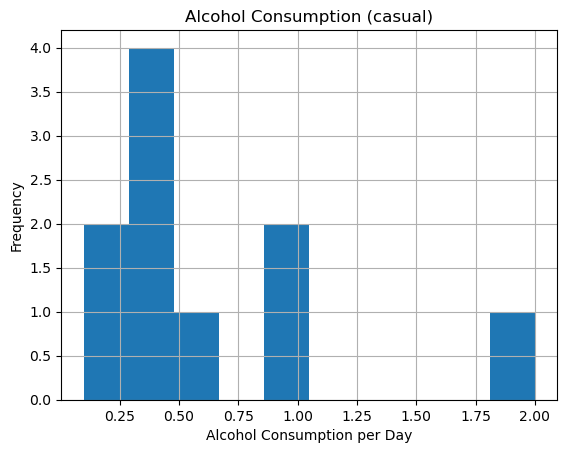

Skewness: 1.47, use MEDIAN.
Median value for "casual": 0.35


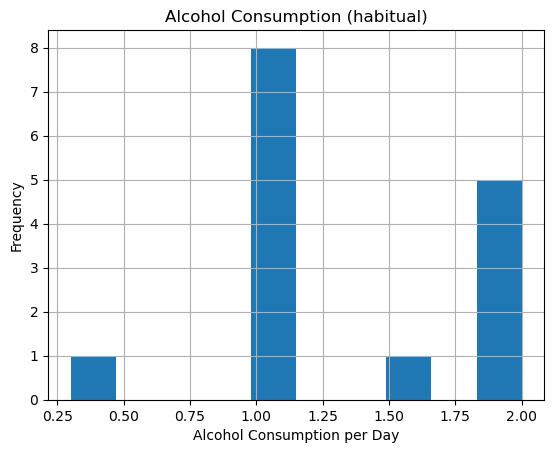

Skewness: 0.11, use MEAN.
Mean value for "habitual": 1.32


In [38]:
imputation(clean_cat_df, 'alcohol_consumption', 'alcohol_pd')

In [ ]:
# Check the distribution and confirm the count
counts = clean_cat_df['alcohol_pd'].value_counts(dropna=False)
print(f'Total converted: {counts.sum()}\n{counts}')

Total converted: 208
alcohol_pd
0.35    91
0.00    84
1.00    10
1.32     8
2.00     6
0.30     4
0.10     2
0.40     1
1.50     1
0.50     1
Name: count, dtype: int64


In [48]:
# Convert the column to a float with 2 decimal points
clean_cat_df['alcohol_pd'] = clean_cat_df['alcohol_pd'].astype(float).round(2)

# Confirm changes
clean_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    208 non-null    object 
 1   age                   208 non-null    int64  
 2   gender                208 non-null    object 
 3   diagnosis             208 non-null    object 
 4   occupation_status     167 non-null    object 
 5   vhi_score             208 non-null    int64  
 6   rsi_score             208 non-null    int64  
 7   smoker                208 non-null    object 
 8   cigarettes_pd         208 non-null    int64  
 9   alcohol_consumption   208 non-null    object 
 10  alcohol_pd            208 non-null    float64
 11  water_litres_pd       208 non-null    object 
 12  carbonated_beverages  208 non-null    object 
 13  carbonated_pd         21 non-null     object 
 14  tomatoes              208 non-null    object 
 15  coffee                2

#### `water_litres_pd` column

In [49]:
# Check the water_litres_pd column
clean_cat_df['water_litres_pd'].value_counts(dropna=False)

water_litres_pd
1       78
2       59
1,5     58
0,5      6
2,5      4
0,75     2
0,25     1
Name: count, dtype: int64

__NOTE__: No null values, need to clean the commas.

In [50]:
# Apply the clean_pd function to the column
clean_cat_df['water_litres_pd'] = clean_cat_df['water_litres_pd'].apply(clean_pd)

# Check the value counts
clean_cat_df['water_litres_pd'].value_counts(dropna=False)

water_litres_pd
1.00    78
2.00    59
1.50    58
0.50     6
2.50     4
0.75     2
0.25     1
Name: count, dtype: int64

In [51]:
# Convert the column to a float with 2 decimal points
clean_cat_df['water_litres_pd'] = clean_cat_df['water_litres_pd'].astype(float).round(2)

# Confirm changes
clean_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    208 non-null    object 
 1   age                   208 non-null    int64  
 2   gender                208 non-null    object 
 3   diagnosis             208 non-null    object 
 4   occupation_status     167 non-null    object 
 5   vhi_score             208 non-null    int64  
 6   rsi_score             208 non-null    int64  
 7   smoker                208 non-null    object 
 8   cigarettes_pd         208 non-null    int64  
 9   alcohol_consumption   208 non-null    object 
 10  alcohol_pd            208 non-null    float64
 11  water_litres_pd       208 non-null    float64
 12  carbonated_beverages  208 non-null    object 
 13  carbonated_pd         21 non-null     object 
 14  tomatoes              208 non-null    object 
 15  coffee                2

#### `carbonated_pd` column

In [52]:
# Check the carbonated_pd column
clean_cat_df['carbonated_pd'].value_counts(dropna=False)

carbonated_pd
NaN               187
1                   8
3                   2
1 for week          2
2 for week          2
0.1                 2
2-3 for mounth      1
0.5                 1
2 for mounth        1
4                   1
0,5                 1
Name: count, dtype: int64

__NOTE__: Need to update the `clean_pd()` function